In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from imblearn.over_sampling import SMOTE

%matplotlib inline

In [170]:
data=pd.read_csv("data/1. Weather Data.csv")

In [171]:
data.sample(5)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
7881,11/24/2012 9:00,1.6,-0.9,83,33,24.1,99.58,Rain Showers
5683,8/24/2012 19:00,26.1,13.4,45,11,25.0,101.73,Mostly Cloudy
8272,12/10/2012 16:00,0.0,-0.5,96,6,4.0,99.41,"Rain,Fog"
6266,9/18/2012 2:00,16.6,12.1,75,9,25.0,100.75,Clear
8760,12/31/2012 0:00,-11.1,-14.4,77,26,25.0,101.51,Cloudy


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


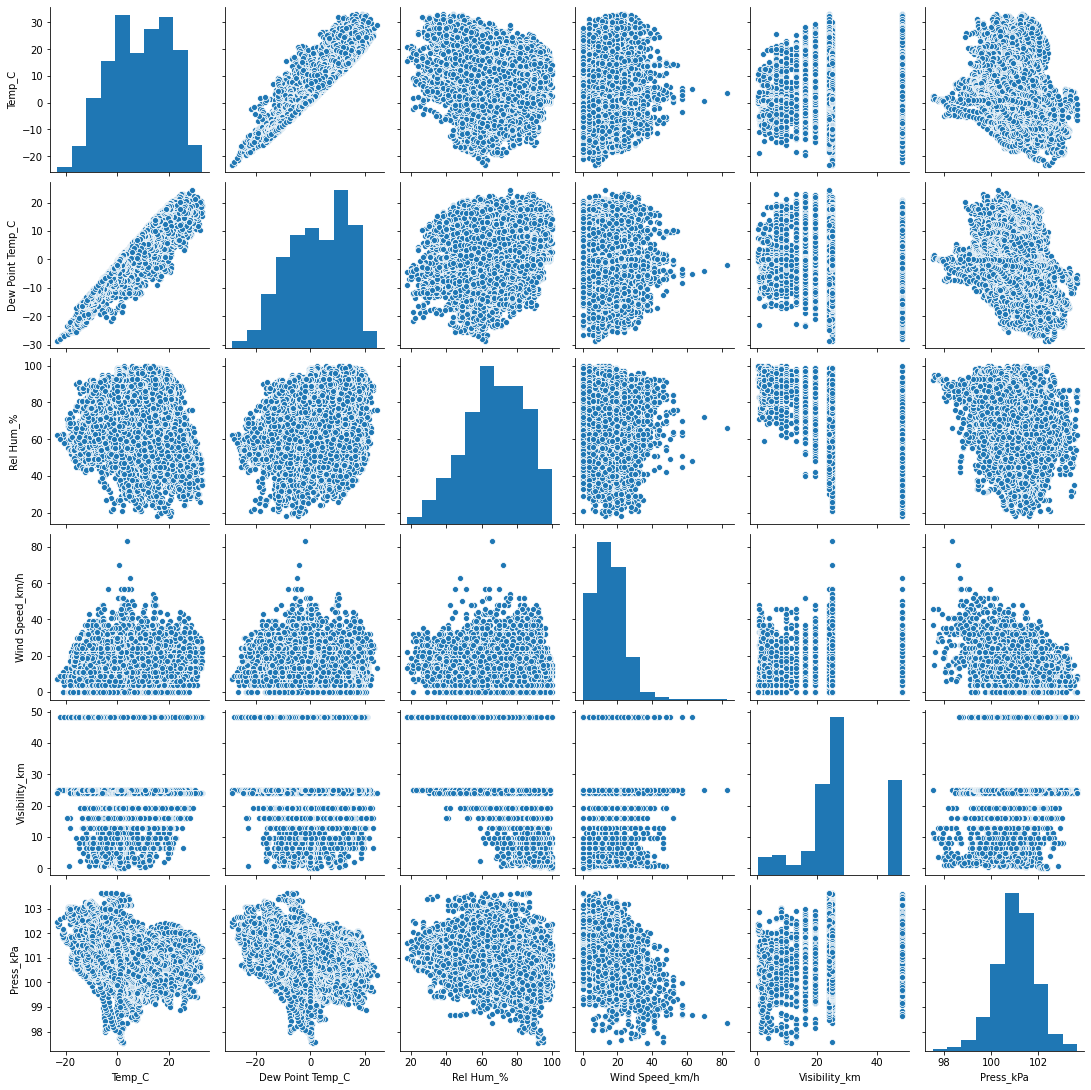

In [173]:
sns.pairplot(data)

In [174]:
data.Visibility_km.value_counts()

25.0    3324
48.3    2014
24.1    1921
19.3     281
16.1     224
9.7      181
12.9     174
6.4      129
8.0      122
4.8       79
4.0       55
2.4       50
3.2       42
11.3      36
2.0       28
1.2       28
1.6       25
0.6       16
2.8       15
1.0       11
3.6       11
0.2        8
0.8        7
0.4        3
Name: Visibility_km, dtype: int64

In [175]:
data[data.Visibility_km==48.3]["Weather"].value_counts()

Mainly Clear     871
Mostly Cloudy    602
Clear            313
Cloudy           223
Rain Showers       2
Rain               2
Snow Showers       1
Name: Weather, dtype: int64

In [176]:
data[data.Visibility_km==0.4]["Weather"].value_counts()

Fog    3
Name: Weather, dtype: int64

In [177]:
data["Date/Time"]=data["Date/Time"].astype("datetime64[ns]")

In [178]:
data["month"]=pd.DatetimeIndex(data["Date/Time"]).month

In [179]:
data["day"]=pd.DatetimeIndex(data["Date/Time"]).day
data["hour"]=pd.DatetimeIndex(data["Date/Time"]).hour

In [180]:
data.drop("Date/Time",axis=1,inplace=True)

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temp_C            8784 non-null   float64
 1   Dew Point Temp_C  8784 non-null   float64
 2   Rel Hum_%         8784 non-null   int64  
 3   Wind Speed_km/h   8784 non-null   int64  
 4   Visibility_km     8784 non-null   float64
 5   Press_kPa         8784 non-null   float64
 6   Weather           8784 non-null   object 
 7   month             8784 non-null   int64  
 8   day               8784 non-null   int64  
 9   hour              8784 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 686.4+ KB


In [182]:
data.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

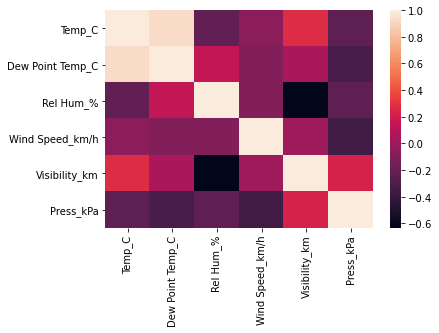

In [183]:
sns.heatmap(data.drop(["month","day","hour"],axis=1).corr())

In [184]:
data.Weather.value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [185]:
#data.Weather.value_counts()[data.Weather.value_counts()<=10].sum()

In [186]:
#78/len(data) * 100

In [187]:
#low_labels=data.Weather.value_counts()[data.Weather.value_counts()<=10].index

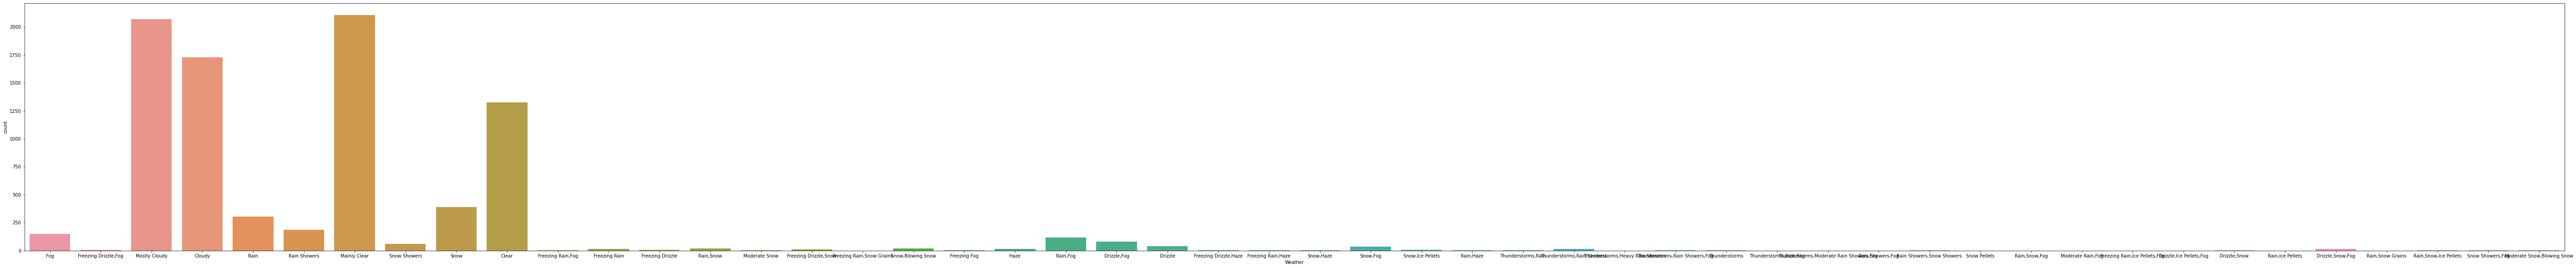

In [188]:
plt.figure(figsize=(100,10))
sns.countplot("Weather",data=data)

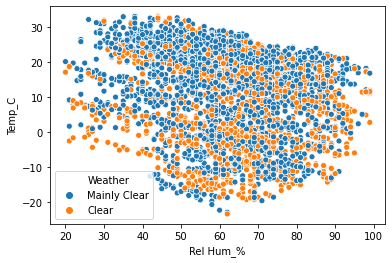

In [189]:
sns.scatterplot(x="Rel Hum_%",y="Temp_C",data=data[(data["Weather"]=="Mainly Clear")|(data["Weather"]=="Clear")],hue="Weather")

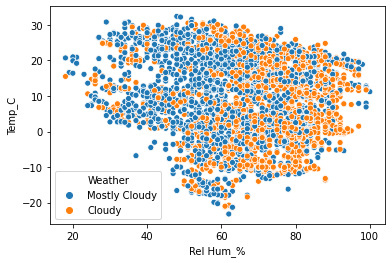

In [190]:
sns.scatterplot(x="Rel Hum_%",y="Temp_C",data=data[(data["Weather"]=="Cloudy")|(data["Weather"]=="Mostly Cloudy")],hue="Weather")

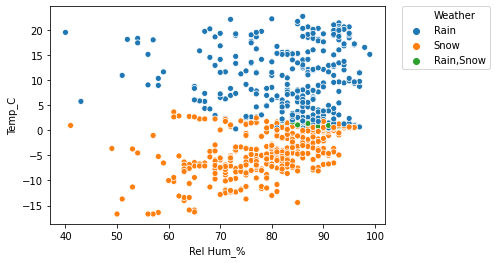

In [191]:
sns.scatterplot(x="Rel Hum_%",y="Temp_C",data=data[(data["Weather"]=="Rain")|(data["Weather"]=="Rain,Snow")|(data["Weather"]=="Snow")],hue="Weather")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [192]:
#data.loc[(data.Weather=="Rain,Snow"),"Weather"]="Rain"

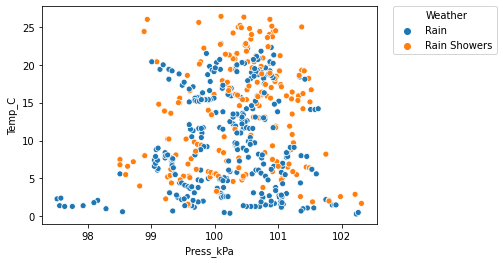

In [193]:
sns.scatterplot(x="Press_kPa",y="Temp_C",data=data[(data["Weather"]=="Rain")|(data["Weather"]=="Rain Showers")],hue="Weather")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [194]:
#data.loc[(data.Weather=="Rain Showers"),"Weather"]="Rain"

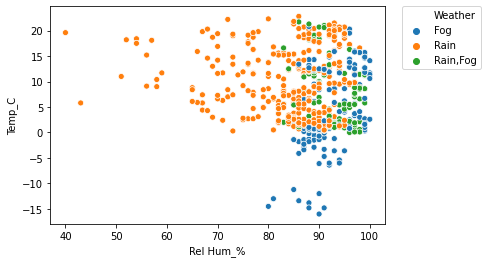

In [195]:
sns.scatterplot(x="Rel Hum_%",y="Temp_C",data=data[(data["Weather"]=="Rain")|(data["Weather"]=="Rain,Fog")|(data["Weather"]=="Fog")],hue="Weather")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [196]:
#data.loc[(data.Weather=="Rain,Fog"),"Weather"]="Rain"

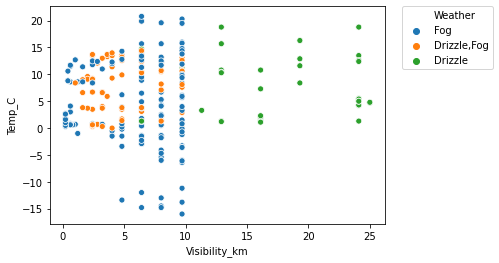

In [197]:
sns.scatterplot(x="Visibility_km",y="Temp_C",data=data[(data["Weather"]=="Drizzle,Fog")|(data["Weather"]=="Fog")|(data["Weather"]=="Drizzle")],hue="Weather")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [198]:
#data.loc[(data.Weather=="Drizzle,Fog"),"Weather"]="Fog"

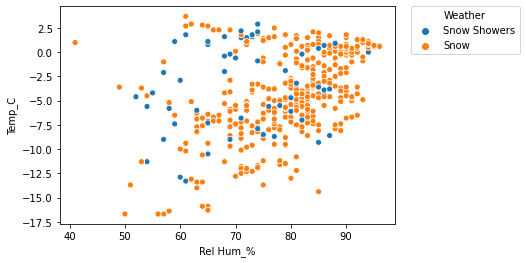

In [199]:
sns.scatterplot(x="Rel Hum_%",y="Temp_C",data=data[(data["Weather"]=="Snow")|(data["Weather"]=="Snow Showers")],hue="Weather")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [200]:
#data.loc[(data.Weather=="Snow Showers"),"Weather"]="Snow"

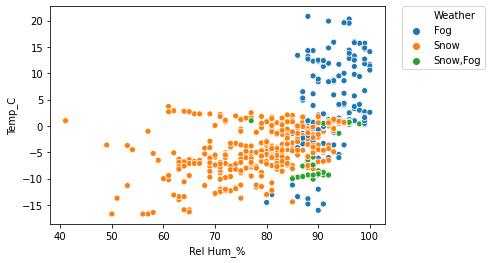

In [201]:
sns.scatterplot(x="Rel Hum_%",y="Temp_C",data=data[(data["Weather"]=="Snow")|(data["Weather"]=="Fog")|(data["Weather"]=="Snow,Fog")],hue="Weather")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [202]:
#data.loc[(data.Weather=="Snow,Fog"),"Weather"]="Snow"

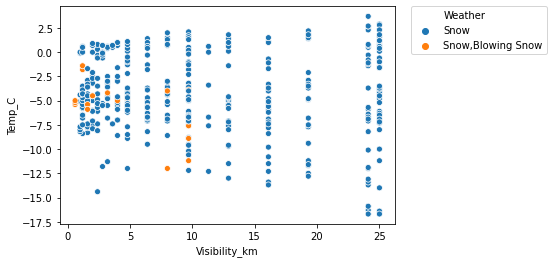

In [203]:
sns.scatterplot(x="Visibility_km",y="Temp_C",data=data[(data["Weather"]=="Snow,Blowing Snow")|(data["Weather"]=="Snow")],hue="Weather")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [204]:
data.loc[(data.Weather=="Snow,Blowing Snow"),"Weather"]="Snow"

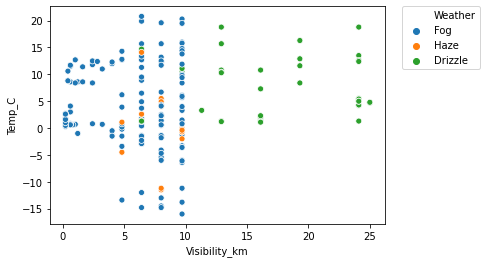

In [205]:
sns.scatterplot(x="Visibility_km",y="Temp_C",data=data[(data["Weather"]=="Haze")|(data["Weather"]=="Fog")|(data["Weather"]=="Drizzle")],hue="Weather")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [206]:
#data.loc[(data.Weather=="Haze"),"Weather"]="Fog"

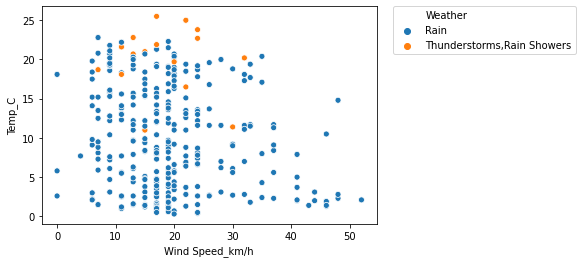

In [207]:
sns.scatterplot(x="Wind Speed_km/h",y="Temp_C",data=data[(data["Weather"]=="Thunderstorms,Rain Showers")|(data["Weather"]=="Rain")],hue="Weather")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [208]:
#data.loc[(data.Weather=="Thunderstorms,Rain Showers"),"Weather"]="Rain"

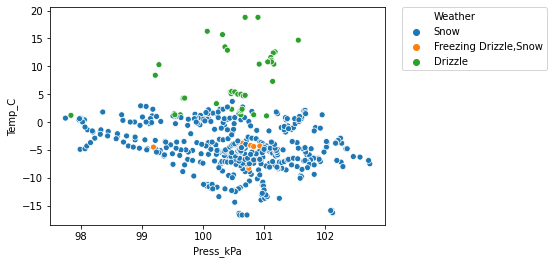

In [209]:
sns.scatterplot(x="Press_kPa",y="Temp_C",data=data[(data["Weather"]=="Freezing Drizzle,Snow")|(data["Weather"]=="Drizzle")|(data["Weather"]=="Snow")],hue="Weather")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [210]:
#data.loc[(data.Weather=="Freezing Drizzle,Snow"),"Weather"]="Snow"

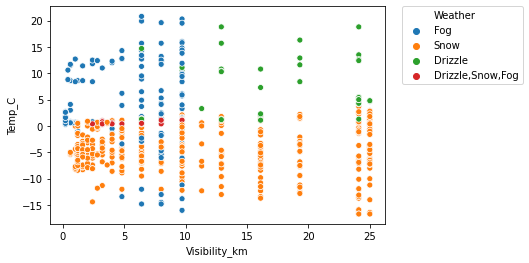

In [211]:
sns.scatterplot(x="Visibility_km",y="Temp_C",data=data[(data["Weather"]=="Drizzle,Snow,Fog")|(data["Weather"]=="Drizzle")|(data["Weather"]=="Snow")|(data["Weather"]=="Fog")],hue="Weather")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [212]:
#data.loc[(data.Weather=="Drizzle,Snow,Fog"),"Weather"]="Snow"

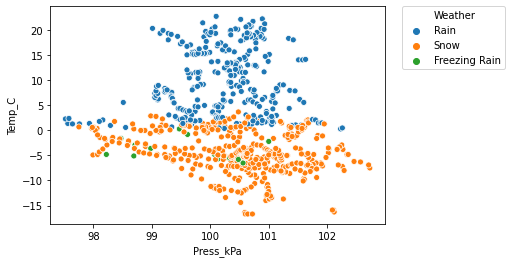

In [213]:
sns.scatterplot(x="Press_kPa",y="Temp_C",data=data[(data["Weather"]=="Freezing Rain")|(data["Weather"]=="Rain")|(data["Weather"]=="Snow")],hue="Weather")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [214]:
#data.loc[(data.Weather=="Freezing Rain"),"Weather"]="Snow"

In [215]:
data.Weather.value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        409
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Rain,Snow                                    18
Haze                                         16
Thunderstorms,Rain Showers                   16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                              7
Freezing Drizzle,Fog                    

In [216]:
#data=data[~data.Weather.isin(low_labels)]

In [217]:
#data.Weather.value_counts()

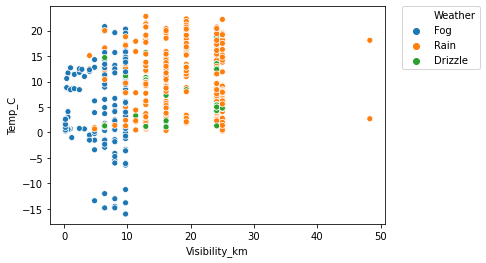

In [218]:
sns.scatterplot(x="Visibility_km",y="Temp_C",data=data[(data["Weather"]=="Rain")|(data["Weather"]=="Fog")|(data["Weather"]=="Drizzle")],hue="Weather")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [219]:
#data.loc[(data.Weather=="Drizzle"),"Weather"]="Rain"

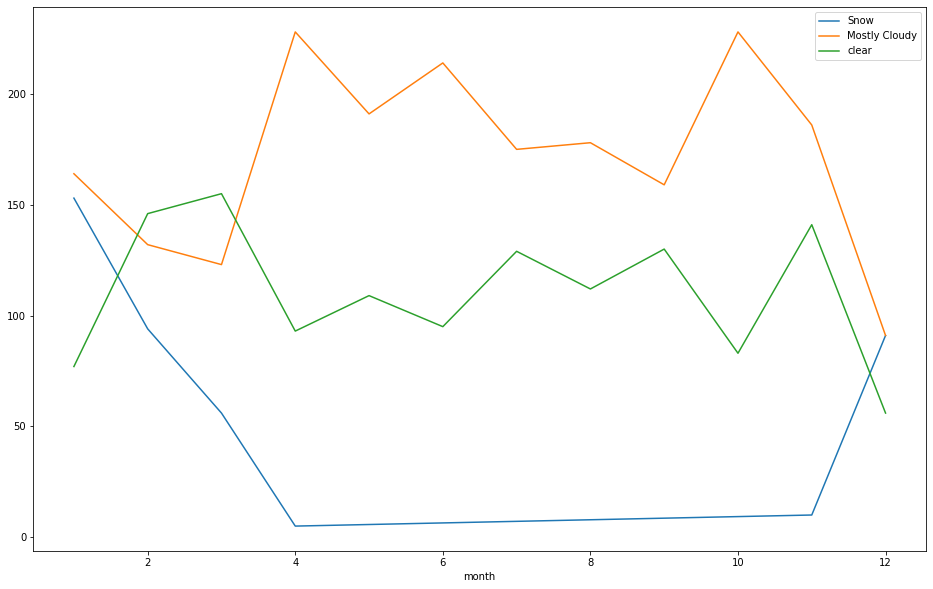

In [220]:
plt.figure(figsize=(16,10))
data[data["Weather"]=="Snow"].groupby("month").count()["Weather"].plot(label="Snow")
data[data["Weather"]=="Mostly Cloudy"].groupby("month").count()["Weather"].plot(label="Mostly Cloudy")
data[data["Weather"]=="Clear"].groupby("month").count()["Weather"].plot(label="clear")

plt.legend()

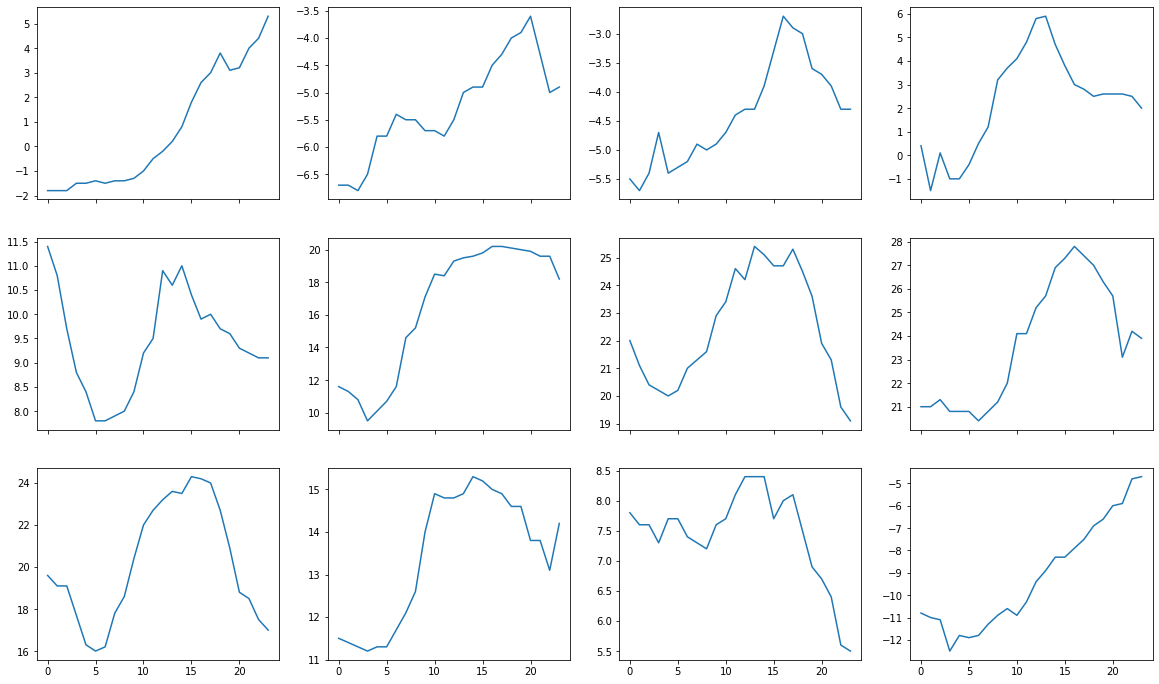

In [221]:
fig,axe=plt.subplots(3,4,sharex=True,figsize=(20,12))
axe[0,0].plot(data[(data["month"]==1) & (data["day"]==1)]["hour"],data[(data["month"]==1) & (data["day"]==1)]["Temp_C"])
axe[0,1].plot(data[(data["month"]==2) & (data["day"]==1)]["hour"],data[(data["month"]==2) & (data["day"]==1)]["Temp_C"])
axe[0,2].plot(data[(data["month"]==3) & (data["day"]==1)]["hour"],data[(data["month"]==3) & (data["day"]==1)]["Temp_C"])
axe[0,3].plot(data[(data["month"]==4) & (data["day"]==1)]["hour"],data[(data["month"]==4) & (data["day"]==1)]["Temp_C"])
axe[1,0].plot(data[(data["month"]==5) & (data["day"]==1)]["hour"],data[(data["month"]==5) & (data["day"]==1)]["Temp_C"])
axe[1,1].plot(data[(data["month"]==6) & (data["day"]==1)]["hour"],data[(data["month"]==6) & (data["day"]==1)]["Temp_C"])
axe[1,2].plot(data[(data["month"]==7) & (data["day"]==1)]["hour"],data[(data["month"]==7) & (data["day"]==1)]["Temp_C"])
axe[1,3].plot(data[(data["month"]==8) & (data["day"]==1)]["hour"],data[(data["month"]==8) & (data["day"]==1)]["Temp_C"])
axe[2,0].plot(data[(data["month"]==9) & (data["day"]==1)]["hour"],data[(data["month"]==9) & (data["day"]==1)]["Temp_C"])
axe[2,1].plot(data[(data["month"]==10) & (data["day"]==1)]["hour"],data[(data["month"]==10) & (data["day"]==1)]["Temp_C"])
axe[2,2].plot(data[(data["month"]==11) & (data["day"]==1)]["hour"],data[(data["month"]==11) & (data["day"]==1)]["Temp_C"])
axe[2,3].plot(data[(data["month"]==12) & (data["day"]==1)]["hour"],data[(data["month"]==12) & (data["day"]==1)]["Temp_C"])

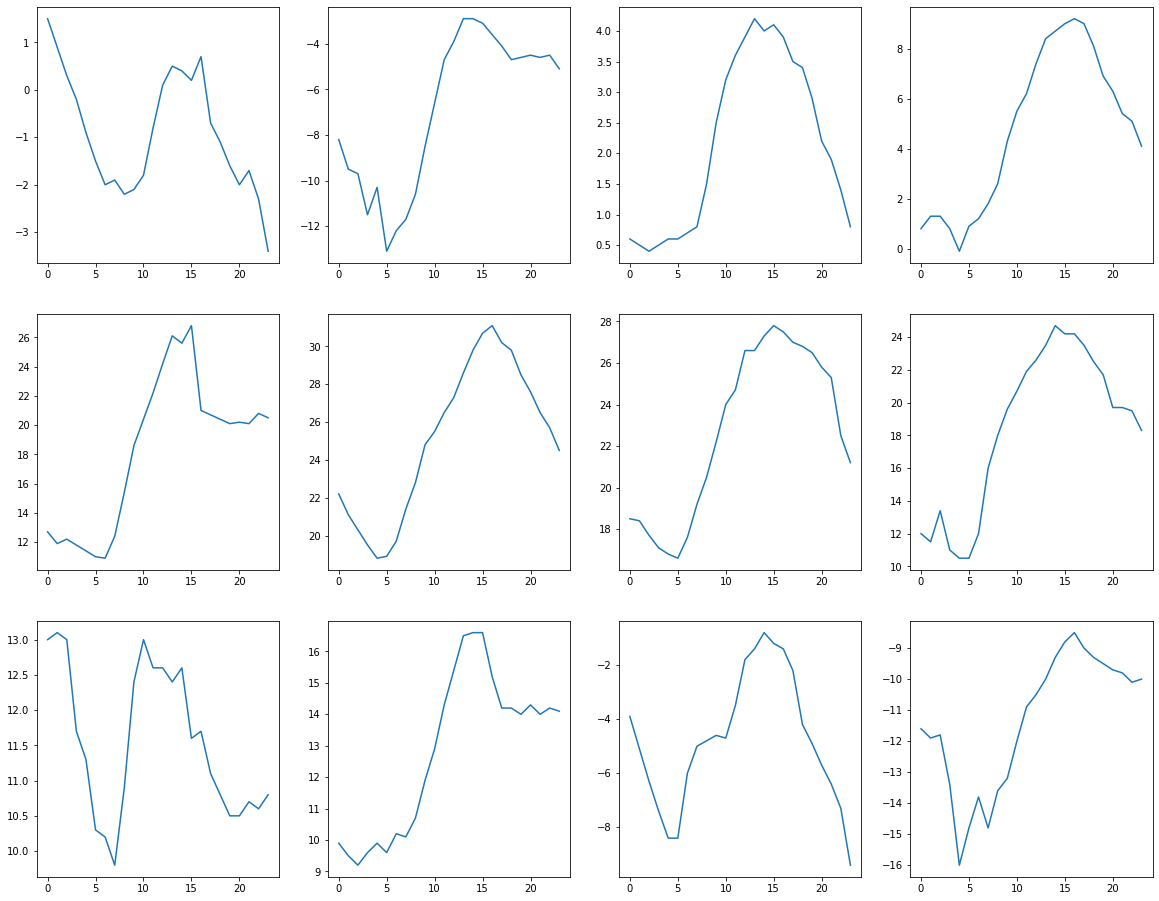

In [222]:
plt.figure(figsize=(20,16))
for i in range(1,13):
    axe=plt.subplot(3,4,i)
    axe.plot(data[(data["month"]==i) & (data["day"]==29)]["hour"],data[(data["month"]==i) & (data["day"]==29)]["Temp_C"])
    

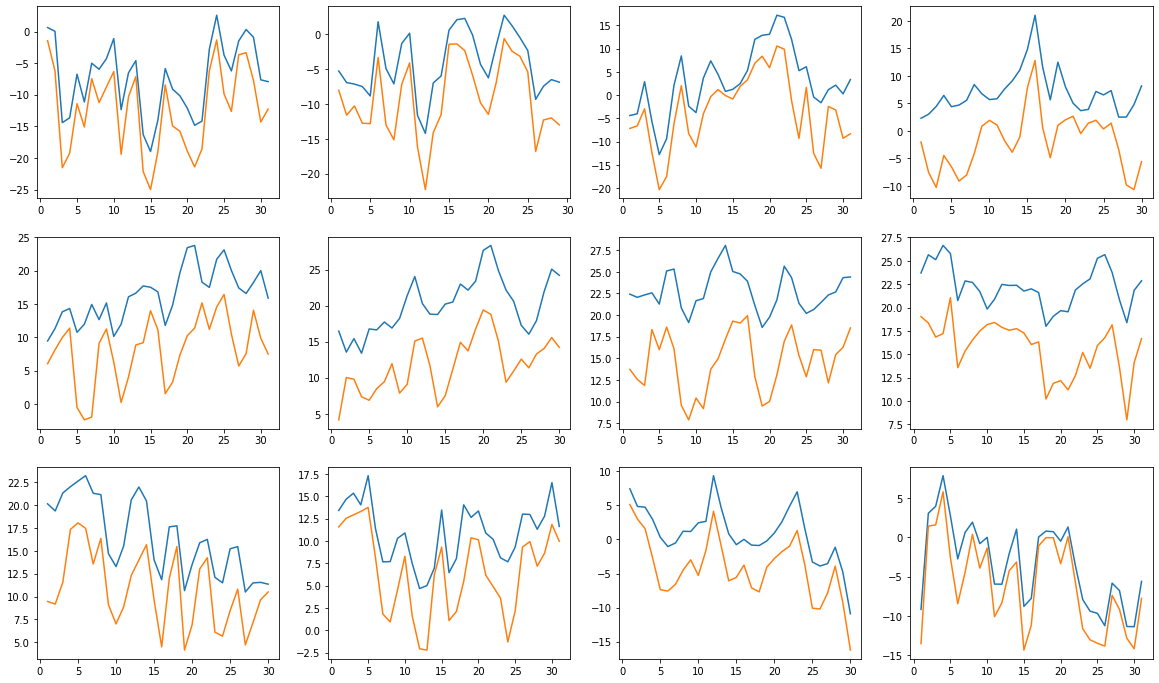

In [223]:
plt.figure(figsize=(20,12))
for i in range(1,13):
    axe=plt.subplot(3,4,i)
    axe.plot(data[data["month"]==i].groupby("day").mean()["Temp_C"])
    axe.plot(data[data["month"]==i].groupby("day").mean()["Dew Point Temp_C"])

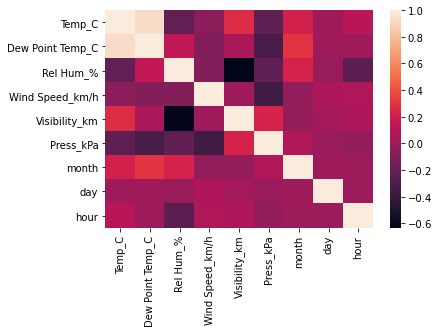

In [224]:
sns.heatmap(data.corr())

In [225]:
#data.select_dtypes(include="object").columns

In [226]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#data["Weather"]=le.fit_transform(data["Weather"])

In [227]:
#data

In [228]:
data.drop(["hour","day","month"],axis=1,inplace=True)

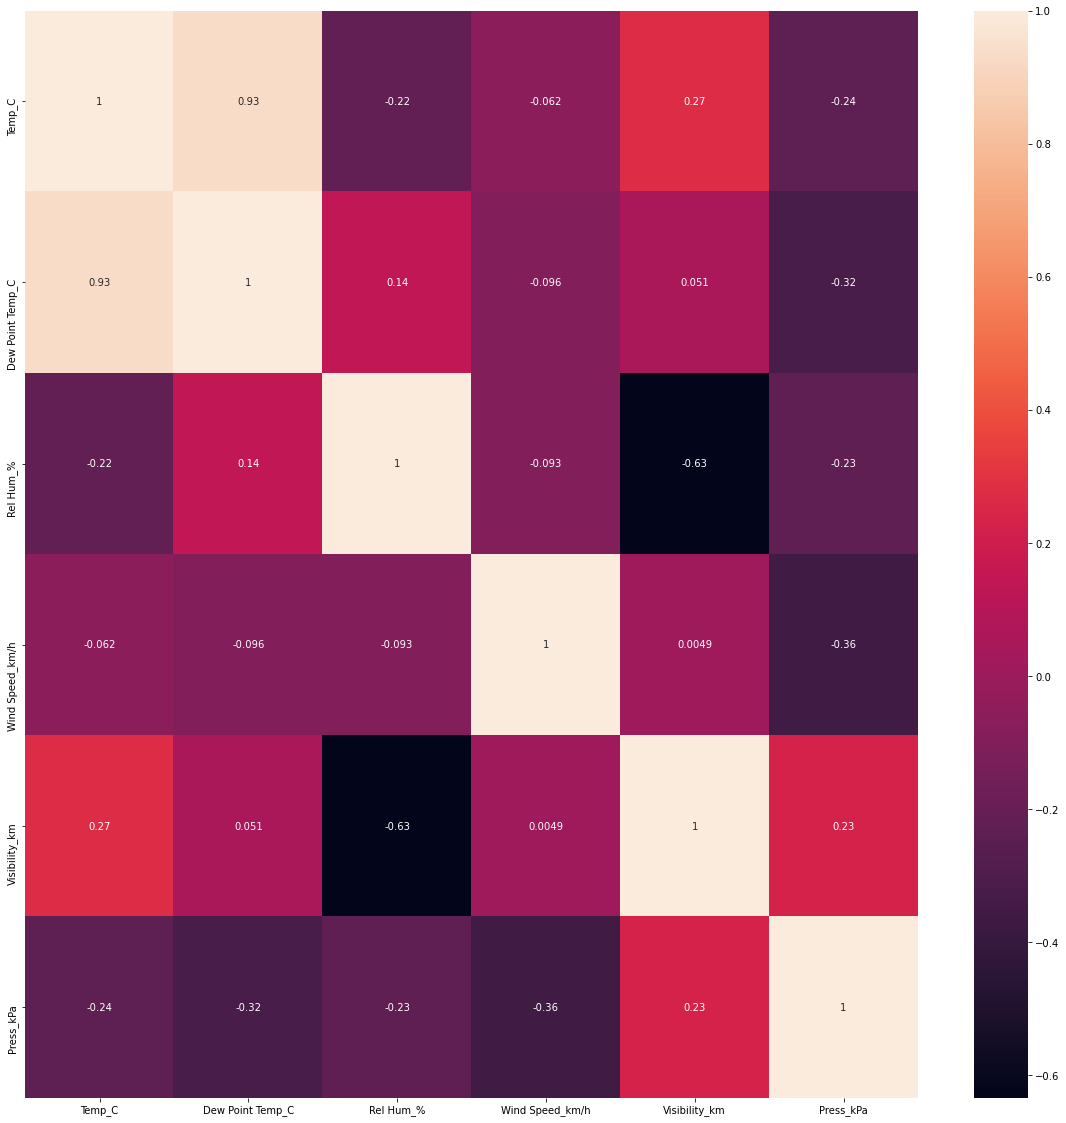

In [229]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

In [230]:
#from sklearn.model_selection import train_test_split

In [231]:
#X=data.drop("Weather",axis=1)
#y=data["Weather"]

In [232]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [233]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#X_train=scaler.fit_transform(X_train)
#X_test=scaler.transform(X_test)

In [234]:
#y_train.value_counts().sort_index()

In [235]:
#y_test.value_counts().sort_index()

In [236]:
#from imblearn.over_sampling import SMOTE
#smote=SMOTE(random_state=42,    k_neighbors=20)
#X_train_res,y_train_res=smote.fit_sample(X_train,y_train)

In [237]:
#from imblearn.under_sampling import NearMiss
#us=NearMiss()
#X_train_res,y_train_res=us.fit_sample(X_train,y_train)

In [238]:
#from imblearn.over_sampling import RandomOverSampler
#os=RandomOverSampler(random_state=42)
#X_train_res,y_train_res=os.fit_sample(X_train,y_train)

In [239]:
#X_train_res.shape,y_train_res.shape

In [240]:
#from collections import Counter
#print(f"Original label column value counts {Counter(y_train)}")
#print(f"After Random Over Sample {Counter(y_train_res)}")

In [241]:
#from sklearn.ensemble import RandomForestClassifier

In [242]:
#estimator=np.linspace(10,200,20)
#estimator=estimator.astype("int64")

In [243]:
#print("Estimator  train_score    test_score\n")
#for i in estimator:
#    model=RandomForestClassifier(n_estimators=i)
#    model.fit(X_train_res,y_train_res)
#    print(f"{i}         {model.score(X_train_res,y_train_res)}            {model.score(X_test,y_test)}")